# Perkenalan

Dibuat Oleh Arry Pandowo, student Full Stack Data Science Batch 01 Hacktiv8

# Problems

<ol>
<li> Model mana yang lebih baik digunakan antara Decision Tree dan Random Forest </li>
<li> Justifikasi penggunan hyper parameter pada masing masing model </li>
<ol>

# Library

## Basic library

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np

## Model Import

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Other tools

In [43]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Loading

Data loading sumber [data]('https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility')

In [28]:
df = pd.read_csv('heart.csv')

In [11]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


informasi sementara : 
* Seluruh data dalam bentuk integer sehingga tidak diperlukan proses encoding
* Dalam dataset tidak memiliki data Null tidak diperlukan proses cleaning

<AxesSubplot:>

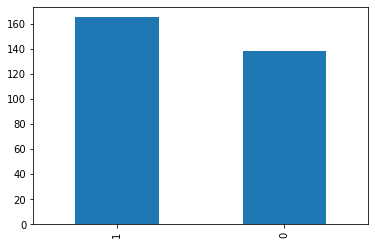

In [7]:
df['target'].value_counts().plot(kind='bar')

> Data target tidak memiliki kecenderungan skewness sehingga ama untuk diolah lebih lanjut didalam model tanpa adanya proses resampling

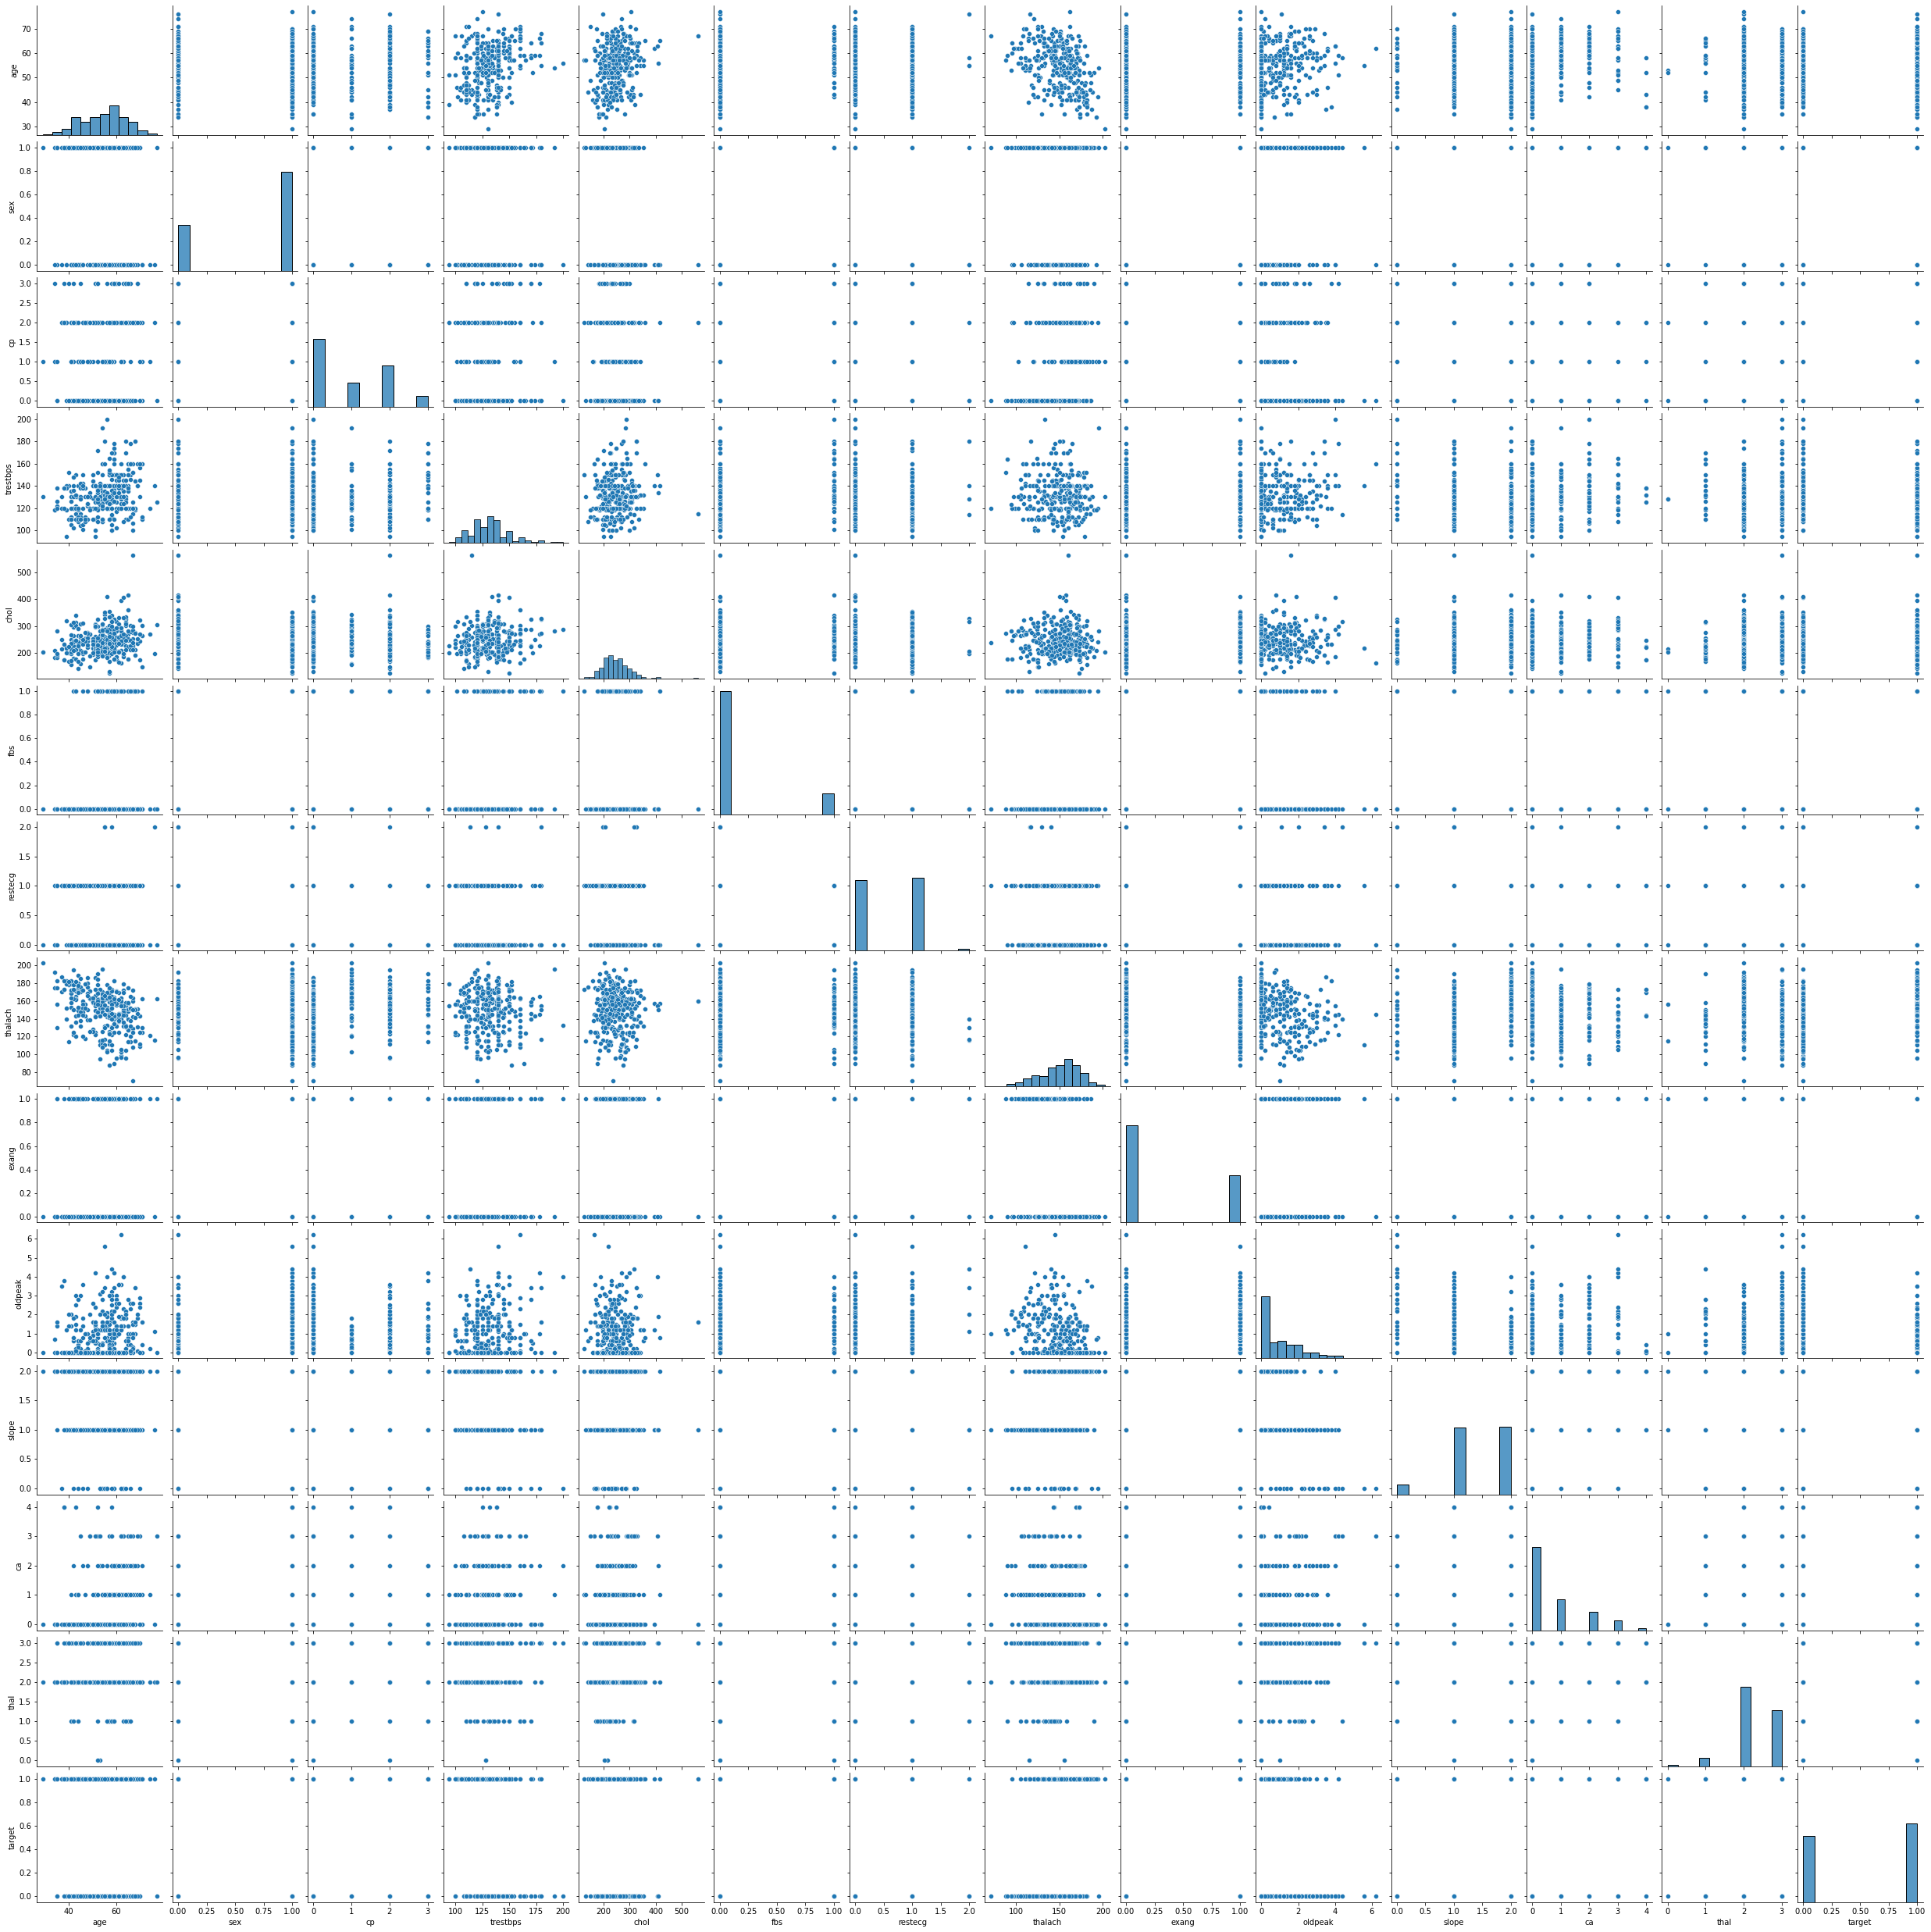

In [10]:
sns.pairplot(df)

Sebaran data aman tidak menunjukan adanya skewness ke arah tertentu dengan sebaran data menunjukan distribusi normal

In [4]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# Data Cleaning

Tidak dibutuhkan 

# Eksplorasi Data

## hubungan antar feature

### age to chol

<AxesSubplot:xlabel='age', ylabel='chol'>

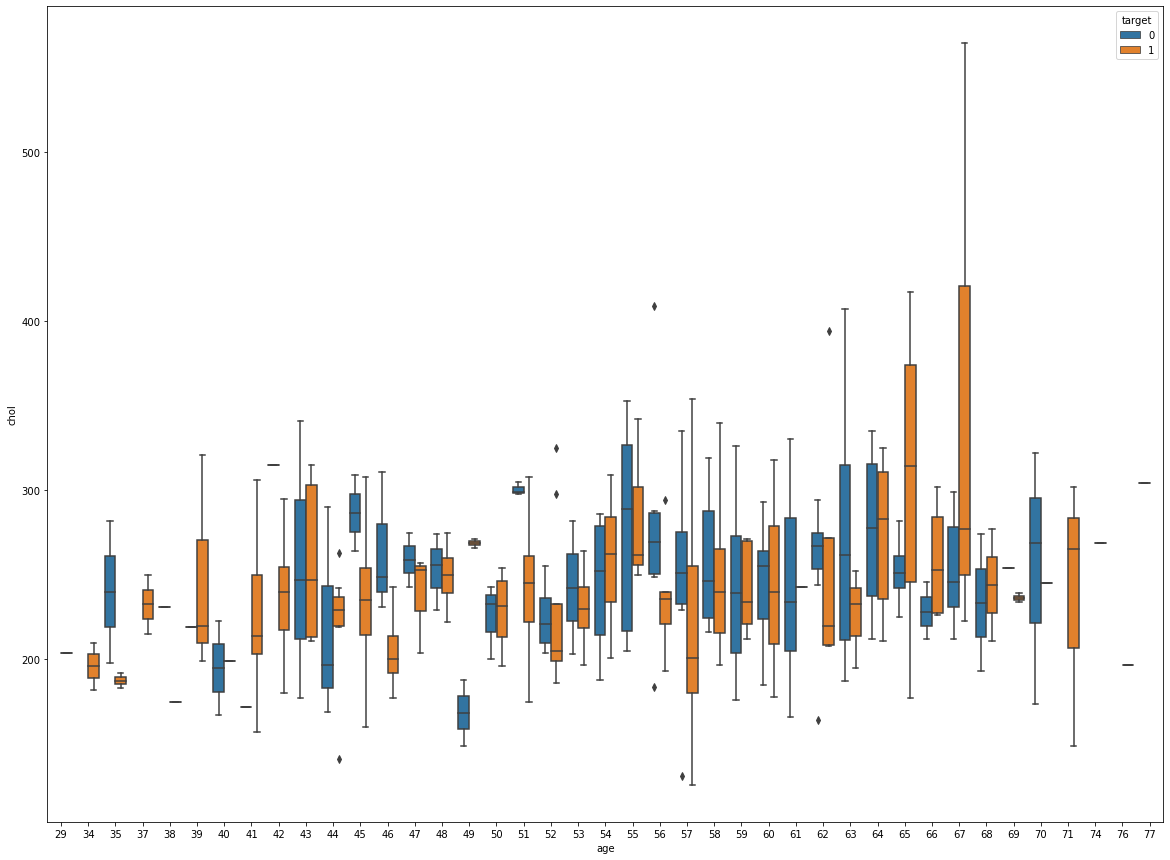

In [66]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df,x='age',y="chol", hue="target")

* tidak terdapat data outlier pada cholestrol
* terdapat kecenderungan berbanding lurus antara positifnya serangan jantung kepada umur dan peningkatan cholestrol

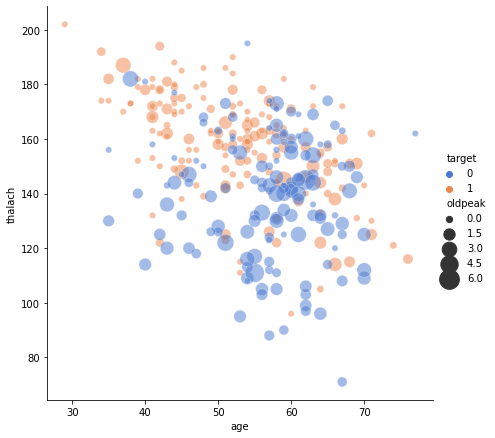

In [67]:
sns.relplot(x="age", y="thalach", hue="target", size="oldpeak",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

* thalach memiliki hubungan berbanding lurus dengan target, semakin besar thalach memiliki kemungkinan terkena serangan jantung lebih besar
* terdapat kecenderungan negative corelativity antara old peak dan thalach, oldpeak yang besar memiliki kecenderungan terkena serangan jantung lebih kecil dan thalach yang rendah

C:\Users\arryp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


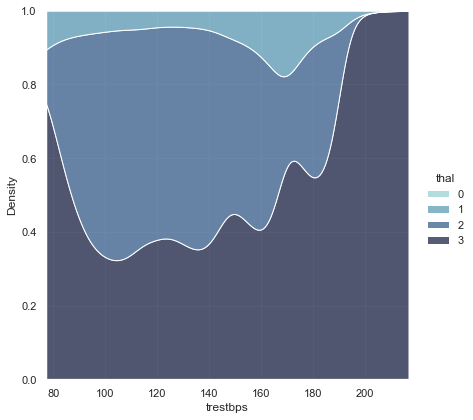

In [76]:
sns.displot(
    data=df,
    x="trestbps", hue="thal",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

Hubungan data cenderung terpusat pada sisi sebelah kanan dimana data trestbs memiliki hubungan  berbanding lurus dengan kategori dari thal 

# Data Preprocessing

tidak memerlukan encoding dan proses preprocessing, data siap untuk di identifikasi lebih lanjut (mungkin)

## Analisa Korelasi Heatmap

<AxesSubplot:>

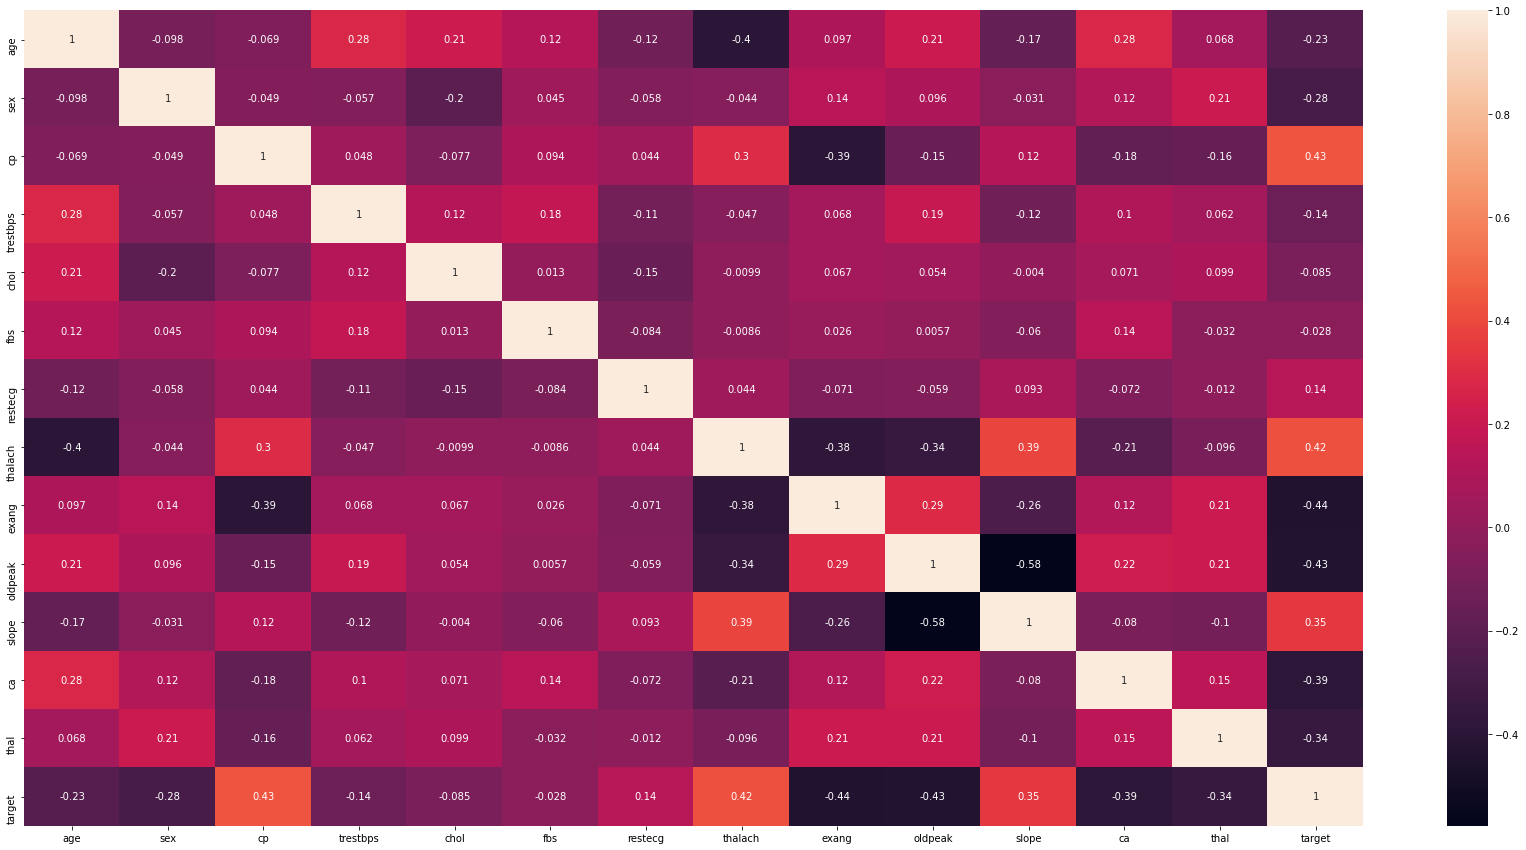

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)

So Far aman, bisa digunakan, korelasi antar feature tidak begitu tinggi

## Multicolinearity Test

In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

feature        VIF
0        age  39.077814
1        sex   3.655523
2         cp   2.608099
3   trestbps  58.584679
4       chol  26.180223
5        fbs   1.259326
6    restecg   2.068119
7    thalach  43.284953
8      exang   2.059665
9    oldpeak   2.409229
10        ca   1.919639
11      thal  17.637066
12    target   4.363430

Sesuai deskripsi pada [dimari]('https://archive.ics.uci.edu/ml/datasets/Heart+Disease') yang merupakan situs resmi penjelasan atas data set, data berikut memiliki deskripsi : 

slope di drop karena tidak memiliki keterkaitan langsung dengan feature lainnya, perhitungan dari slope pada model dapat berpotensi mengurangi pembobotan dikarenakan tidak feature ST pada dataset versi kaggle


test drop

In [30]:
df.drop(['slope'], axis=1, inplace=True)

# Pendefinisian Model

## Scalling data dengan data scaller

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [33]:
scaler=StandardScaler()
X=scaler.fit_transform(df)

## Assign variable untuk Cross Validation

In [37]:
X_val_real = df.drop(['target'], axis=1)
y_val_real = df['target']

## Pendefinisian Feature dan Target

In [36]:
X=df.drop(['target'], axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Pelatihan Model

## Grid Search + penetapan hyperparameter

In [41]:
params=[
    {'max_depth':[4,5], 'criterion':['gini','entropy']},
    {'n_estimators':[50,100],'max_depth':[4,5,6]},
]

grid=[
    GridSearchCV(DecisionTreeClassifier(),params[0],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(RandomForestClassifier(),params[1],scoring='accuracy',cv=5,n_jobs=10),
]

for g in grid:
    g.fit(X_train,y_train)

Pemilihan hyperparameter Decision Tree diatas dengan pertimbangan sebagai berikut : 
* perlu dilakukan testing antara criterion gini dan entropy untuk melihat apakah data lebih baik di treat sebagai random index label menggunakan gini, atau pengukuran ketidakteraturan dengan menggunakan entropi
perbedaan keduanya terletak di nilai indexing dimana GIni dengan nilai interval [0, 0.5] dan entropy [0, 1]
* perlu juga dilakukan juga pengetesan max_depth dimana kecenderungan atas hyperparameter ini adalah semakin besar max_depth maka akan memiliki akurasi lebih tinggi (cateris paribus)

Pemilihan hyperparameter Decision Tree diatas dengan pertimbangan sebagai berikut : 
* perlu dilakukan testing antara jumlah estimator dengan maxdepth dari data diatas, nestimator dalam hal data ini bertindak sebagai kontrol atas variable yagn memiliki nilai rendah, dengan asumsi data kearah distribusi normal maka estimator yang kemungkinan dipilih dengan angka lebih kecil dengan metode skoring akurasi
* Max depth juga memiliki kecenderungan yang sama apabila taarget skoring akurasi, sehingga yang akan dipilih adalah 4

## Model assignment dari hasil Grid Search

In [42]:
models=[
    DecisionTreeClassifier(max_depth=grid[0].best_params_['max_depth'],criterion=grid[0].best_params_['criterion'] ),
    RandomForestClassifier(n_estimators=grid[1].best_params_['n_estimators'],max_depth=grid[1].best_params_['max_depth']),
]
for mod in models:
    mod.fit(X_train,y_train)
    

# Evaluasi Model

## Visualisasi SKor ROC Curve

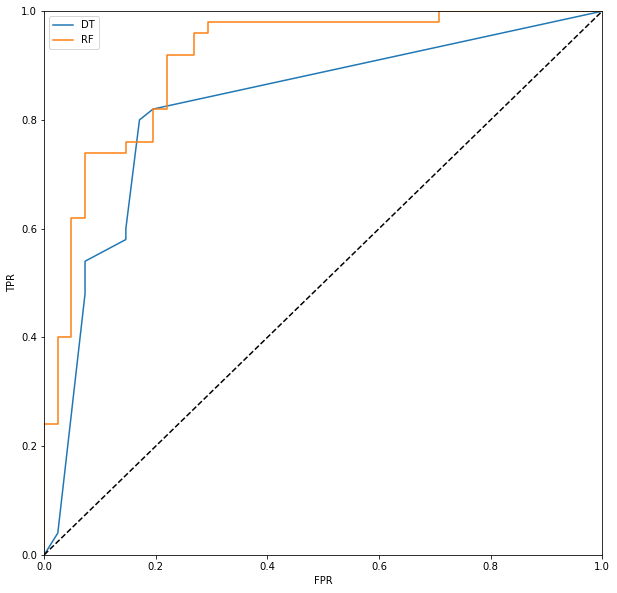

In [48]:
y_pred1=[mod.predict(X_test) for mod in models]
scores1=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores1]
#roc_auc_scores=[roc_auc_score(y_pred1[i],scores1[i],multi_class='ovo') for i in range(len(models))]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['DT','RF']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(df.target.unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [50]:
models

[DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=4)]

Best parameter yang terpilih pada Decision Tree adalah : 
> kombinasi antara criterion default gini dan maxdepth 5, dari total 4 kombinasi yang dilakukan pada gridsearchCV


Best Parameter yang terpilih pada Random Forest adalah : 
> estimator default dengan angka 100 dengan maxdepth 5, dari total 4 kombinasi yang dilakukan pada gridsearchC

In [49]:
class_report.transpose()

precision    recall        f1  support
DT_0   0.772727  0.829268  0.800000     41.0
DT_1   0.851064  0.800000  0.824742     50.0
RF_0   0.842105  0.780488  0.810127     41.0
RF_1   0.830189  0.880000  0.854369     50.0

Secara umum Random Forest lebih unggul dengan kemampuan melakukan prediksi 0 (Tidak) dengan skor f1 81 dan 1 (ya) dengan skor 85%, cukup baik untuks ebuah model prediksi 

## Cross Validation

In [51]:
kf=KFold(n_splits=5)

Kfold untuk validasi dipilih 5 dengan mempertimbangkan waktu komputasi karena dilakukan di lokal

In [53]:
for mod in models:
    z = cross_val_score(mod, X_val_real, y_val_real, scoring='accuracy', cv=kf, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (np.mean(z), np.std(z)))

Accuracy: 0.700 (0.122)
Accuracy: 0.699 (0.089)


Skor cukup baik balik lagi analisa dari EDA

# Model Inference

## Dataset Inference

In [56]:
df_inf = pd.read_csv('Inference_heart.csv')

In [58]:
X_val_inf = df_inf.drop(['target', 'slope'], axis=1)
X_inf=scaler.fit_transform(X_val_inf)

In [65]:
for mod in models:
    hasil = mod.predict(X_inf)
    if hasil == 1:
        print('Heart Disease')
    else:
        print('Not Heart Disease')

Heart Disease
Heart Disease


Kedua Model berhasil melakukan prediksi dengan hasil Hearth Disease

# Kesimpulan

Berdasarkan hasil dari Evaluasi Model dan ROC Curve dipilih Random Forest sebagai model yang digunakan

Secara umum Random forest pasti lebih baik dibandingkan dengan Decision Tree dikarenakan :
Sebuah Decision Tree menggabungkan beberapa keputusan, sedangkan Random Forest menggabungkan beberapa dari Decision Tree tergantung dari jumlah estimator dan depth. sehingga dapat menghasilkan akurasi yang lebih baik apabila level dari depth di gunakan sama

Secara teori Decision Tree dapat berjalan pada model lebih cepat namun tidak dapat terukur didalam dataset ini dikarenakan jumlah dataset yang cukup sedikit

> # Random Forest yang dipilih